In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
from keras.preprocessing import image
from keras.models import Sequential, model_from_json
from keras.layers import Input
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import utils, optimizers, applications

/home/phongsathron/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
class_num = 8

In [4]:
model = Sequential()
model.add(applications.resnet50.ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3), name='input')))
model.add(Flatten())
model.add(Dense(class_num, activation='softmax'))

/home/phongsathron/anaconda3/lib/python3.6/site-packages/keras_applications/resnet50.py:263: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 802824    
Total params: 24,390,536
Trainable params: 24,337,416
Non-trainable params: 53,120
_________________________________________________________________


In [6]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'resnet50': <keras.engine.training.Model at 0x7ff0d0059860>,
 'flatten_1': <keras.layers.core.Flatten at 0x7ff138137198>,
 'dense_1': <keras.layers.core.Dense at 0x7ff0bce68a20>}

In [7]:
ls ..

 action/    facenet/               main.py         temps/            windows.py
 align/     keras-retinanet/       models/         Untitled1.ipynb
 crop.py   'Machine Learning'/     prediction.py   Untitled.ipynb
 emotion/   Machine.Learning.zip   __pycache__/    web_api.py


In [8]:
model.load_weights("../models/emotion/emotion.h5")

In [9]:
img = cv2.imread("Screenshot from 2018-09-15 23-45-44.png", cv2.IMREAD_COLOR)
img = cv2.resize(img, (224, 224), interpolation = cv2.INTER_CUBIC)

In [10]:
# img = image.load_img(os.path.abspath("Screenshot from 2018-09-15 23-45-44.png"), target_size=(224, 224))
# img

In [11]:
# x = image.img_to_array(img)
x = img
x[:] = np.max(x,axis=-1,keepdims=1)/2+np.min(x,axis=-1,keepdims=1)/2
# x = applications.resnet50.preprocess_input(arr)
x = np.expand_dims(x, axis=0)

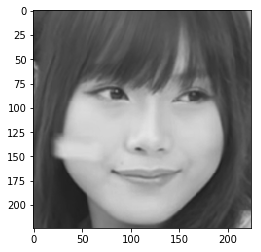

In [12]:
plt.imshow(x[0]/255)

In [13]:
labels = ["anger", "contempt", "disgust", "fear", "happiness", "neutral", "sadness", "surprise"]

In [14]:
predict = model.predict(x)

In [15]:
predict[0]

array([1.8563427e-02, 1.0010392e-04, 4.5407977e-04, 1.2458088e-03,
       7.4633442e-02, 8.8122469e-01, 1.8392090e-03, 2.1939212e-02],
      dtype=float32)

In [16]:
predict[0].argsort()[::-1][:5]

array([5, 4, 7, 0, 6])

In [17]:
for i in predict[0].argsort()[::-1][:5]:
    print(' {:.5f} {}'.format(predict[0][i], labels[i]))

 0.88122 neutral
 0.07463 happiness
 0.02194 surprise
 0.01856 anger
 0.00184 sadness
